Hospital Emergency Arrival

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import binom, poisson
import datetime as dt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Day.csv to Day (1).csv


In [ ]:
df=pd.read_csv('Day.csv')
print(df.columns)

Index(['PatientId', 'PatientName', 'PatientAge', 'BloodPressure', 'HeartRate',
       'Temp', 'critical', 'ArrivalTime', 'Department'],
      dtype='object')


In [ ]:
df.head()

,PatientId,PatientName,PatientAge,BloodPressure,HeartRate,Temp,critical,ArrivalTime,Department
0,p001,Ayaz,45,120/80,120,98,0,10:00,ortho
1,p002,Shahmeer,34,110/70,100,98,0,12:13,ortho
2,p003,Ali,33,150/90,170,99,1,12:20,neural
3,p004,Ghazala,24,120/80,100,98,0,16:00,general
4,p005,Hamza,55,120/80,100,98,0,14:50,general


In [ ]:
print(df.dtypes)

PatientId        object
PatientName      object
PatientAge        int64
BloodPressure    object
HeartRate         int64
Temp              int64
critical          int64
ArrivalTime      object
Department       object
dtype: object


In [ ]:
df.shape

(100, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PatientId      100 non-null    object
 1   PatientName    100 non-null    object
 2   PatientAge     100 non-null    int64 
 3   BloodPressure  100 non-null    object
 4   HeartRate      100 non-null    int64 
 5   Temp           100 non-null    int64 
 6   critical       100 non-null    int64 
 7   ArrivalTime    100 non-null    object
 8   Department     100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,PatientAge,HeartRate,Temp,critical
count,100.000000,100.000000,100.000000,100.000000
mean,35.920000,107.140000,99.140000,0.440000
std,21.077385,36.647108,1.825853,0.498888
min,3.000000,48.000000,96.000000,0.000000
25%,20.750000,80.000000,98.000000,0.000000
50%,33.500000,100.000000,98.000000,0.000000
75%,45.750000,120.000000,100.000000,1.000000
max,90.000000,200.000000,105.000000,1.000000


In [ ]:
df[['Systolic', 'Diastolic']] = df['BloodPressure'].str.split('/', expand=True).astype(int)


In [ ]:
df.head()

,PatientId,PatientName,PatientAge,BloodPressure,HeartRate,Temp,critical,ArrivalTime,Department,Systolic,Diastolic
0,p001,Ayaz,45,120/80,120,98,0,10:00,ortho,120,80
1,p002,Shahmeer,34,110/70,100,98,0,12:13,ortho,110,70
2,p003,Ali,33,150/90,170,99,1,12:20,neural,150,90
3,p004,Ghazala,24,120/80,100,98,0,16:00,general,120,80
4,p005,Hamza,55,120/80,100,98,0,14:50,general,120,80


In [ ]:
# 4. Define features and target
X = df[['HeartRate', 'Systolic', 'Diastolic', 'PatientAge', 'Temp']]
y = df['critical']  # Assuming 'critical' is the target column

In [ ]:
# 5. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#learns patient is critical or not critical
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Prediction of patient being critical: ", y_pred)

Prediction of patient being critical:  [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1]


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print('\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.85


Confusion Matrix:
 [[13  0]
 [ 3  4]]


In [ ]:
print("\n--- Predicting a New Patient ---")
try:
    heart_rate = float(input("Enter Heart Rate: "))
    systolic = float(input("Enter Systolic BP: "))
    diastolic = float(input("Enter Diastolic BP: "))
    age = float(input("Enter Patient Age: "))
    temp = float(input("Enter Temperature: "))


    new_data = np.array([[heart_rate, systolic, diastolic, age, temp]])
    new_data_scaled = scaler.transform(new_data)

    prediction = model.predict(new_data_scaled)[0]
    probability = model.predict_proba(new_data_scaled)[0][1]  # Probability of being critical

    print("\nPrediction for new patient:")
    print("Critical" if prediction == 1 else "Not Critical")
    print(f"Probability of being critical: {probability:.2f}")

except ValueError:
    print("Invalid input. Please enter numerical values only.")


--- Predicting a New Patient ---
Enter Heart Rate: 150
Enter Systolic BP: 150
Enter Diastolic BP: 90
Enter Patient Age: 55
Enter Temperature: 98

Prediction for new patient:
Critical
Probability of being critical: 0.75


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
critical_counts = df['critical'].value_counts()
n = len(df)
p = critical_counts[1] / n  # probability of being critical

In [ ]:
# Binomial PMF: What's the chance of exactly k critical patients in a sample of size n are critical
k = np.arange(0, n+1)
binom_probs = binom.pmf(k, n, p)

In [ ]:
#Convert to datetime format (time only, with dummy date)
df['ArrivalTime'] = pd.to_datetime(df['ArrivalTime'], format='%H:%M', errors='coerce')

# Step 2: Now extract the hour safely
df['arrival_hour'] = df['ArrivalTime'].dt.hour


In [ ]:
# Count how many patients arrived at each hour
arrival_counts = df['arrival_hour'].value_counts().sort_index()

# Estimate correct lambda: average number of patients per hour
λ = arrival_counts.mean()

# Values of k: 0 up to a few more than the maximum number of patients in any hour
k_vals = np.arange(0, arrival_counts.max() + 5)

# Compute Poisson PMF with corrected λ
poisson_probs = poisson.pmf(k_vals, λ)

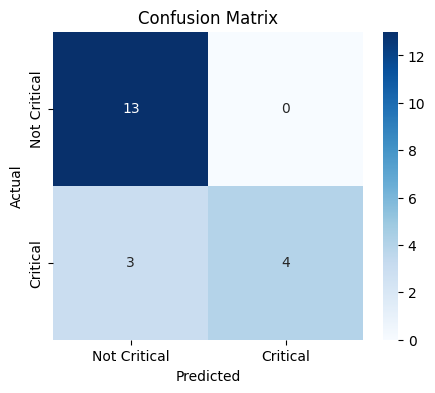

In [ ]:
# Confusion Matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Critical', 'Critical'], yticklabels=['Not Critical', 'Critical'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

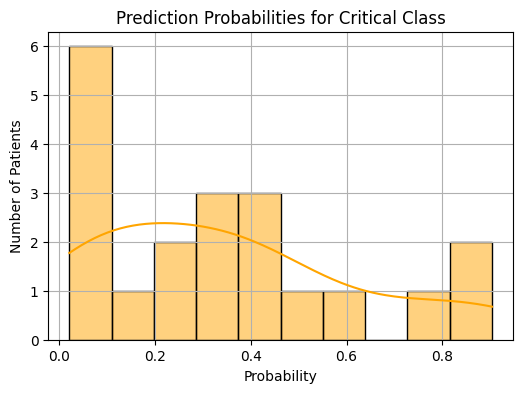

In [ ]:
# Predict probabilities
y_prob = model.predict_proba(X_test)[:,1]  # probability of class 1 (critical)

# Plot histogram of prediction probabilities
plt.figure(figsize=(6,4))
sns.histplot(y_prob, bins=10, kde=True, color='orange')
plt.title('Prediction Probabilities for Critical Class')
plt.xlabel('Probability')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

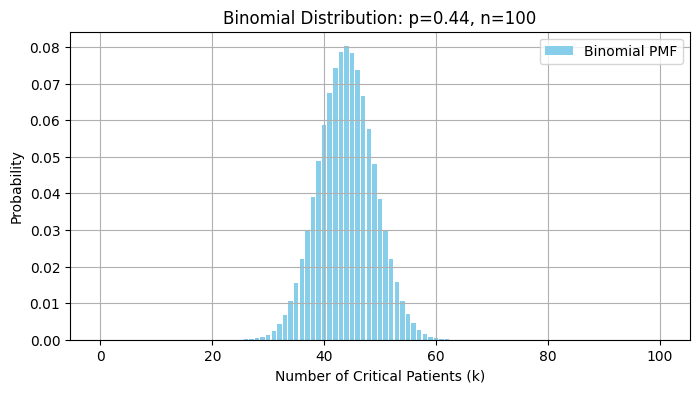

In [ ]:
# Plot
plt.figure(figsize=(8,4))
plt.bar(k, binom_probs, color='skyblue', label='Binomial PMF')
plt.title(f'Binomial Distribution: p={p:.2f}, n={n}')
plt.xlabel('Number of Critical Patients (k)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

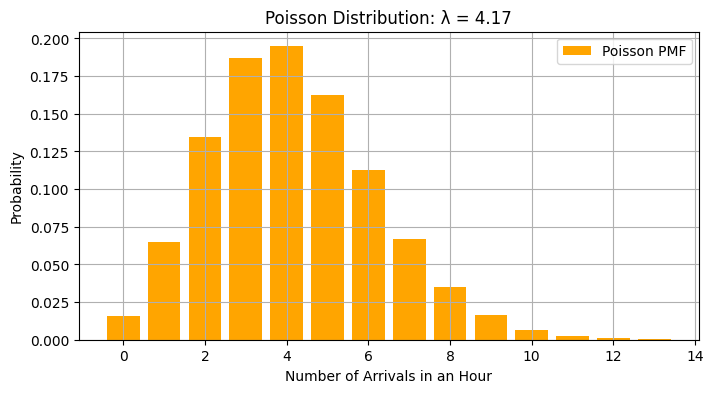

In [ ]:
# Plot
plt.figure(figsize=(8,4))
plt.bar(k_vals, poisson_probs, color='orange', label='Poisson PMF')
plt.title(f'Poisson Distribution: λ = {λ:.2f}')
plt.xlabel('Number of Arrivals in an Hour')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()